In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import calendar
% matplotlib inline


pd.options.display.max_columns = 50

In [2]:
data = pd.read_csv('investments_VC.csv', encoding='iso-8859-1')
data.shape

(54294, 39)

In [3]:
#drop rows with all na values
data.dropna(axis=0, how='all', inplace=True)
data.shape

(49438, 39)

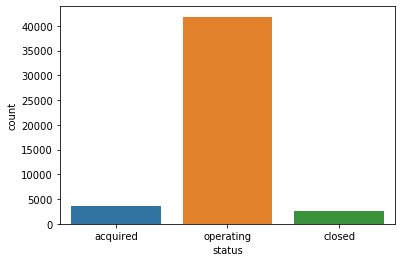

In [4]:
sns.countplot(x='status', data=data)

In [5]:
#target variable
data.status.value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

# Data Cleaning

In [6]:
data.columns = data.columns.str.replace(' ', '') 

#### Converting to proper datatypes

In [7]:
data[["founded_at"]] = data[["founded_at"]].apply(pd.to_datetime, errors='coerce')
data[["last_funding_at"]] = data[["last_funding_at"]].apply(pd.to_datetime, errors='coerce')
data[["founded_month"]] = data[["founded_month"]].apply(pd.to_datetime, errors='coerce')
data[["first_funding_at"]] = data[["first_funding_at"]].apply(pd.to_datetime, errors='coerce')

In [8]:
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')

#### Dropping unneccessary columns

In [9]:
data.drop(['permalink'], axis=1, inplace=True)

In [10]:
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06-01,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaT,NaT,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10-01,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04-01,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1.0,2013-01-28,2013-01-01,2013-Q1,2013.0,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49434,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301,operating,CHN,NaN,Beijing,Beijing,1.0,NaT,NaT,NaN,NaN,2012-04-01,2012-04-01,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5.0,2012-05-13,2012-05-01,2012-Q2,2012.0,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49436,[a]list games,http://www.alistgames.com,|Games|,Games,9300000,operating,NaN,NaN,NaN,NaN,1.0,NaT,NaT,NaN,NaN,2011-11-21,2011-11-21,9300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature engineering

Add domain name ending as a feature.

In [11]:
#split on the domain after last .
end = data["homepage_url"].str.rsplit(".", n = 1, expand = True)
data['url_ending'] = end[1]
# data.url_ending = data['url_ending'].str.rstrip('/')

#remove backslash values in the endings
slashed_vals = data['url_ending'].str.rsplit("/", n = 3, expand = True)
data['url_ending'] = slashed_vals[0]

In [12]:
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,url_ending
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06-01,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2.0,NaT,NaT,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10-01,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,org
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04-01,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1.0,2013-01-28,2013-01-01,2013-Q1,2013.0,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
49434,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1587301,operating,CHN,NaN,Beijing,Beijing,1.0,NaT,NaT,NaN,NaN,2012-04-01,2012-04-01,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5.0,2012-05-13,2012-05-01,2012-Q2,2012.0,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com
49436,[a]list games,http://www.alistgames.com,|Games|,Games,9300000,operating,NaN,NaN,NaN,NaN,1.0,NaT,NaT,NaN,NaN,2011-11-21,2011-11-21,9300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com


Turn month into a string

In [13]:
data['founding_month'] = pd.DatetimeIndex(data['founded_month']).month
data['founding_month'] = data['founding_month'].fillna(0)
data.founding_month = data.founding_month.astype(int)
data['founding_month'] = data['founding_month'].apply(lambda x: calendar.month_abbr[x])

Removing only the quarter from founding_quarter

In [14]:
data['founded_quarter'] = data.founded_quarter.str.split('-').str[1]

calculate the days from the founding of the company to the first funding

In [15]:
data['days_from_founding_to_funding'] = data['first_funding_at']-data['founded_at']

Drop null values from the below columns

In [16]:
data.dropna(subset=['days_from_founding_to_funding', 'url_ending', 'status'], inplace=True)

turn the days from first funding/funding rounds into an int

In [17]:
data['days_from_founding_to_funding'] = data['days_from_founding_to_funding'].dt.days.astype('int16')
data.funding_rounds = data.funding_rounds.astype(int)

time between first and last funding round

In [18]:
data['time_between_first_and_last_funding'] = data['last_funding_at']-data['first_funding_at']
data['time_between_first_and_last_funding'] = data['time_between_first_and_last_funding'].dt.days.astype('int16')
data.time_between_first_and_last_funding = data.time_between_first_and_last_funding.astype(int)

replacing values in founded year, no NA because all observations have founded_at

In [19]:
data['founded_year'] = pd.DatetimeIndex(data['founded_at']).year

In [20]:
data

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,url_ending,founding_month,days_from_founding_to_funding,time_between_first_and_last_funding
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06-01,Q2,2012,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jun,29,0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10-01,Q4,2012,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,org,Oct,-78,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1,2011-04-01,2011-04-01,Q2,2011,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Apr,0,0
7,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,2000000,operating,NaN,NaN,NaN,NaN,1,2007-01-01,2007-01-01,Q1,2007,2008-03-19,2008-03-19,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jan,443,0
8,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2010-01-01,Q1,2010,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,de,Jan,1665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49430,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,15419877,closed,MYS,NaN,MYS - Other,Damansara New Village,4,1994-01-01,1994-01-01,Q1,1994,2008-01-01,2013-02-15,0.0,7991547.0,0.0,0.0,0.0,0.0,2007363.0,5400000.0,20967.0,0.0,0.0,0.0,0.0,7991547.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jan,5113,1872
49432,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,2686600,operating,AUT,NaN,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2007-01-01,Q1,2007,2013-01-29,2013-01-29,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jan,2220,0
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,1,2013-01-28,2013-01-01,Q1,2013,2014-03-24,2014-03-24,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,Jan,420,0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,5,2012-05-13,2012-05-01,Q2,2012,2011-11-01,2014-09-10,71525.0,0.0,0.0,0.0,25873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,com,May,-194,1044


In [21]:
val = data.url_ending.value_counts().index.to_list()

In [22]:
val[-3:][0].rsplit('/')

['com', '2009', '03']

In [23]:
data.loc[data.url_ending.value_counts() < 10]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [24]:
data.category_list = data.category_list.astype(str)

In [25]:
data.category_list = data.category_list.apply(lambda x: x.split('|'))

In [26]:
data.category_list

0        [, Entertainment, Politics, Social Media, News, ]
2                              [, Publishing, Education, ]
3        [, Electronics, Guides, Coffee, Restaurants, M...
7                                        [, Curated Web, ]
8                                           [, Software, ]
                               ...                        
49430                                  [, Biotechnology, ]
49432                                  [, Biotechnology, ]
49433    [, Analytics, Gamification, Developer APIs, iO...
49435    [, Web Development, Advertising, Wireless, Mob...
49437                            [, Enterprise Software, ]
Name: category_list, Length: 35527, dtype: object

In [27]:
[x.strip() for x in data.category_list[0] if x.strip()]

['Entertainment', 'Politics', 'Social Media', 'News']

In [30]:
for i, item in enumerate(data.category_list):
    data.category_list[i] = [x.strip() for x in data.category_list[i] if x.strip()]

/Users/brendanferris/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
data.reset_index(inplace = True, drop = True)

In [139]:
data.category_list[0].split(' ')

AttributeError: 'list' object has no attribute 'split'

In [149]:
data.category_list[2].lower()

AttributeError: 'list' object has no attribute 'str'

In [140]:
uniques = []

for i, item in enumerate(data.category_list):
    for cat in item:
        if cat not in uniques:
            uniques.append(cat.lower())

In [58]:
for item in uniques:
    item = item.split(' ')

In [59]:
uniques

['entertainment',
 'politics',
 'social media',
 'news',
 'publishing',
 'education',
 'electronics',
 'guides',
 'coffee',
 'restaurants',
 'music',
 'iphone',
 'apps',
 'mobile',
 'ios',
 'e-commerce',
 'curated web',
 'software',
 'e-commerce',
 'health and wellness',
 'health and wellness',
 'education',
 'e-commerce',
 'search',
 'marketplaces',
 'art',
 'e-commerce',
 'curated web',
 'curated web',
 'local businesses',
 'restaurants',
 'media',
 'games',
 'health care information technology',
 'analytics',
 'software',
 'curated web',
 'social commerce',
 'e-commerce',
 'mobile commerce',
 'mobility',
 'enterprise software',
 'software',
 'biotechnology',
 'software',
 'social travel',
 'sports',
 'sports',
 'audio',
 'music',
 'mobile',
 'politics',
 'technology',
 'medical devices',
 'pharmaceuticals',
 'personalization',
 'software',
 'small and medium businesses',
 'education',
 'analytics',
 'internet marketing',
 'business services',
 'advertising',
 'e-commerce',
 'saas',


In [60]:
def convert(uniques): 
    return ' '.join(uniques).split() 

In [62]:
uniques = convert(uniques)

In [64]:
len(set(uniques))

790

In [65]:
uniques

['entertainment',
 'politics',
 'social',
 'media',
 'news',
 'publishing',
 'education',
 'electronics',
 'guides',
 'coffee',
 'restaurants',
 'music',
 'iphone',
 'apps',
 'mobile',
 'ios',
 'e-commerce',
 'curated',
 'web',
 'software',
 'e-commerce',
 'health',
 'and',
 'wellness',
 'health',
 'and',
 'wellness',
 'education',
 'e-commerce',
 'search',
 'marketplaces',
 'art',
 'e-commerce',
 'curated',
 'web',
 'curated',
 'web',
 'local',
 'businesses',
 'restaurants',
 'media',
 'games',
 'health',
 'care',
 'information',
 'technology',
 'analytics',
 'software',
 'curated',
 'web',
 'social',
 'commerce',
 'e-commerce',
 'mobile',
 'commerce',
 'mobility',
 'enterprise',
 'software',
 'software',
 'biotechnology',
 'software',
 'social',
 'travel',
 'sports',
 'sports',
 'audio',
 'music',
 'mobile',
 'politics',
 'technology',
 'medical',
 'devices',
 'pharmaceuticals',
 'personalization',
 'software',
 'small',
 'and',
 'medium',
 'businesses',
 'education',
 'analytics',
 

In [72]:
data.loc[1]['category_list']

['Publishing', 'Education']

In [120]:
data.category_list

0            [Entertainment, Politics, Social Media, News]
1                                  [Publishing, Education]
2        [Electronics, Guides, Coffee, Restaurants, Mus...
3                                            [Curated Web]
4                                               [Software]
                               ...                        
35522                                      [Biotechnology]
35523                                      [Biotechnology]
35524    [Analytics, Gamification, Developer APIs, iOS,...
35525     [Web Development, Advertising, Wireless, Mobile]
35526                                [Enterprise Software]
Name: category_list, Length: 35527, dtype: object

In [127]:
s = data.apply(lambda x: pd.Series(x['category_list']),axis=1).stack().reset_index(level=1, drop=True)

In [129]:
objs = [data, pd.DataFrame(data['category_list'].tolist())]

In [132]:
s = data.category_list

In [133]:
pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

,3D,3D Printing,3D Technology,Accounting,Active Lifestyle,Ad Targeting,Advanced Materials,Adventure Travel,Advertising,Advertising Exchanges,Advertising Networks,Advertising Platforms,Advice,Aerospace,Agriculture,Algorithms,All Markets,All Students,Alternative Medicine,Alumni,Analytics,Android,Angels,Animal Feed,App Discovery,...,Web CMS,Web Design,Web Development,Web Hosting,Web Presence Management,Web Tools,WebOS,Weddings,Weird Hardware,Wholesale,Wind,Windows Phone 7,Wine And Spirits,Wire,Wireless,Women,World Domination,Writers,Young Adults,iOS,iPad,iPhone,iPod Touch,mHealth,nan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35525,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


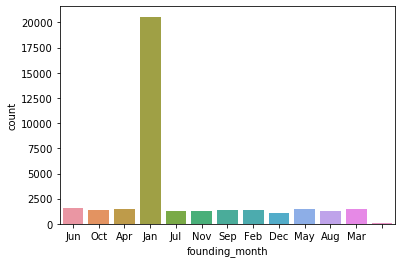

In [91]:
sns.countplot(x='founding_month', data=data);

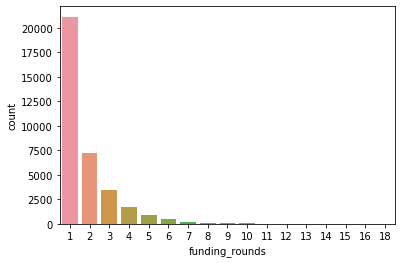

In [95]:
sns.countplot(x='funding_rounds', data=data);

In [112]:
data.founding_month.unique()

array(['Jun', 'Oct', 'Apr', 'Jan', 'Jul', 'Nov', 'Sep', 'Feb', 'Dec',
       'May', 'Aug', 'Mar', ''], dtype=object)